$$
f(x,y) =
    \begin{cases}
        \dfrac{\sqrt{|xy|}}{\sqrt{x^2+y^2}} & (x,y)\neq (0,0)\\[8pt]
        0 & (x,y)=(0,0)
    \end{cases}
$$

- 関数定義、xyに対する関数の出力z

In [29]:
import numpy as np

def f(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    この関数は 原点を中心に角度だけで値が決まる、滑らかな「角度依存型」の関数  
    原点は 0、x軸・y軸も 0、斜め方向で最大  
    3Dで見ると「X字型の尾根が原点を中心に伸びている形」
    """
    denom = np.sqrt(x**2 + y**2)    # denominator 分母
    result = np.zeros_like(x)       # 結果を格納する配列, zeros_like() は x と同じサイズ・型のゼロ配列を作る関数
    mask = denom != 0               # mask はブール配列, denom != 0 で True になるのは原点以外の点, このマスクを使ってゼロ除算を避ける
    result[mask] = np.sqrt(np.abs(x[mask] * y[mask])) / denom[mask]
    return result

# グリッド作成
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

- pyplotで描画

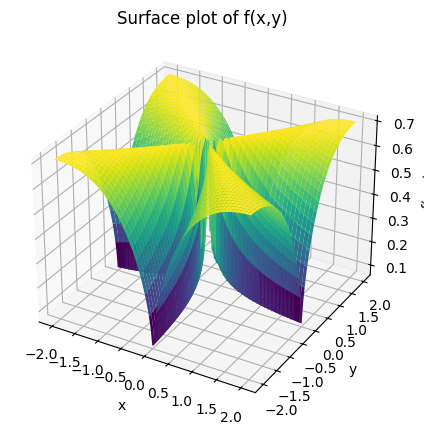

In [30]:
import matplotlib.pyplot as plt

# 3D サーフェスプロット
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")
ax.set(
    xlabel="x",
    ylabel="y",
    zlabel="f(x,y)",    # 何故か見切れる
    title="Surface plot of f(x,y)"
    )
plt.show()


- plotlyで描画（インタラクティブ）

In [31]:
import plotly.graph_objects as go

# 3D サーフェス
fig3d = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])
fig3d.update_layout(scene=dict(
    xaxis_title='x', yaxis_title='y', zaxis_title='f(x,y)'),
    title="3D Surface Plot (Interactive)",
    paper_bgcolor='black',   # 図全体の背景
    plot_bgcolor='black',    # 座標軸の背景
    font_color='white',      # 軸ラベル・タイトルなどの文字色
    width=700, height=600,
)
fig3d.show()
